In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

X = pd.read_csv(os.getenv('X_ALL'), index_col=0)
y = pd.read_csv(os.getenv('Y_ALL'), index_col=0)

# fill NaN with 0
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

X

,episode_id,10-Year-Old Homer,ARTIE,Agnes Skinner,Akira,Alec Baldwin,Alex,All,Amber Dempsey,Annie Crawford,...,Woman,Women,Workers,Zack,number_in_season,number_in_series,original_air_year,season,us_viewers_in_millions,views
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12,12,1990,1,30.40,62561.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,14,1990,2,33.60,59575.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,17,1990,2,26.10,64959.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6,19,1990,2,25.40,50691.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8,21,1990,2,26.20,57605.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14,500,2012,23,5.77,45226.0
596,596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,16,502,2012,23,4.97,44818.0
597,597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,511,2012,24,5.65,39687.0
598,598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12,542,2014,25,2.69,39292.0


In [2]:
# train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Since data is greatly sparse and high-dimensional, we will use a linear model and perform several dimension reduction methods

<Axes: >

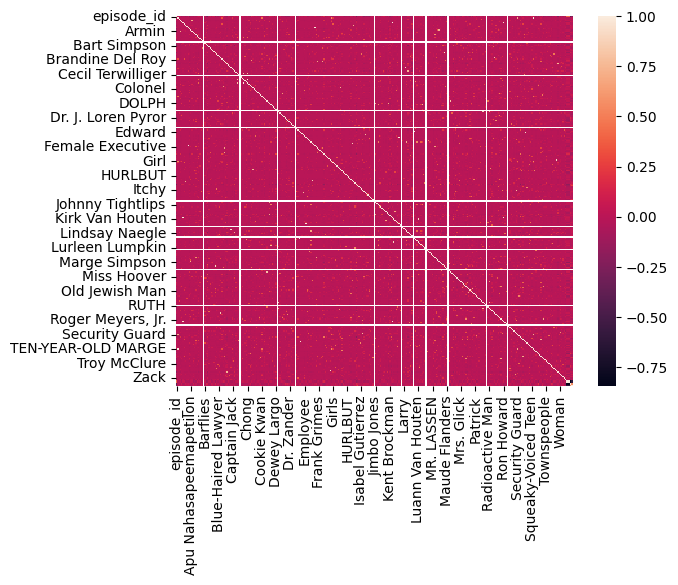

In [3]:
# correlation matrix
X_train.corr()
sns.heatmap(X_train.corr())

In [4]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test_scaled = scaler.transform(X_test)  

# Retain 95% of the variance
pca = PCA(n_components=0.95)

# Fit and transform data
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

X_train_pca

array([[-0.61112398,  0.14001362, -1.22256273, ...,  0.1551882 ,
         0.51047434,  0.14069985],
       [ 3.83129228, -0.12453398, -0.83516118, ...,  0.01657281,
        -0.50991386,  0.18687797],
       [ 0.77568966, -1.2945573 ,  0.65421411, ...,  0.12100048,
         0.07241496, -0.34454761],
       ...,
       [ 3.85556636,  0.33495235, -0.31070946, ...,  0.61214612,
         1.0443833 , -0.81805304],
       [-3.14113748,  2.5978172 , -0.8672595 , ...,  0.24251585,
        -0.19301413,  0.167863  ],
       [ 0.88528434, -0.91724774, -0.23459433, ..., -0.88326498,
         0.0309888 , -0.02341464]])

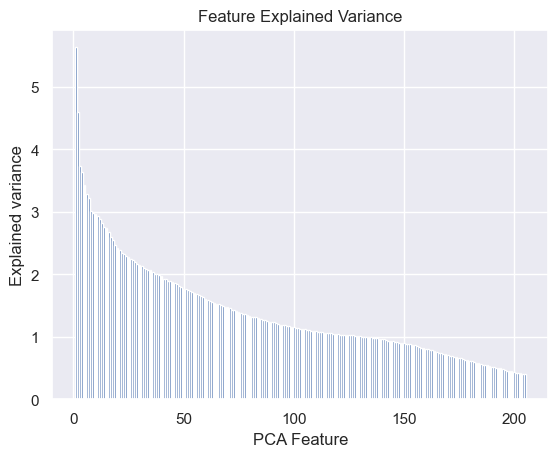

In [5]:
sns.set()

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )


plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

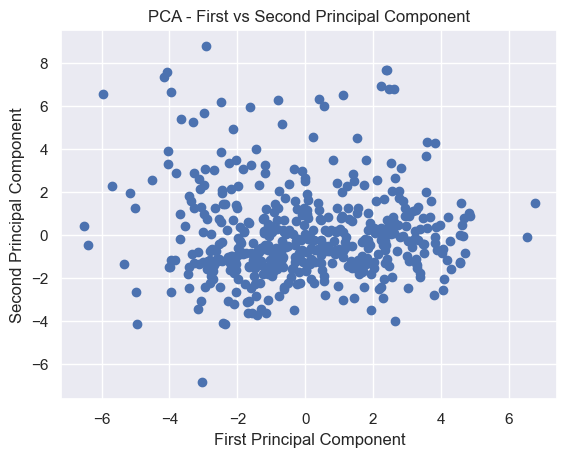

In [6]:
# scatter plot of the first two principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA - First vs Second Principal Component')
plt.show()

In [7]:
# Hyperparameter tuning
lasso = Lasso()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_pca, y_train)

# Best model
best_lasso = grid_search.best_estimator_

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'alpha': 0.1}


In [8]:
# Predictions
y_pred = best_lasso.predict(X_test_pca)

y_pred

array([ 0.49534362,  0.38366702,  0.24405558,  0.68849425,  0.33987366,
        0.79587691,  0.84184218,  0.95245801,  0.45597332,  0.46833683,
        0.76463278,  0.54655313,  0.61533178,  0.24532416,  0.60157803,
        0.1845628 ,  0.85934358,  0.41090761,  0.38786413,  0.64006245,
        0.8728538 ,  0.25263987,  0.4796916 ,  0.15290232,  0.57203738,
        0.38387406,  0.57300793,  0.48958287,  0.39561513,  0.36612394,
        0.15943009,  0.29649066,  0.5724418 ,  2.3530921 ,  0.32633359,
        0.29484215,  0.50618953,  0.1930338 ,  0.34053346,  0.97336043,
        0.31968095,  0.80345499,  0.12522151,  0.13723568,  1.13339319,
        0.34255044,  0.12248212,  0.49119382,  0.81213862,  0.39142807,
        0.80553774,  0.84196377,  0.99263572,  0.36386349,  0.2143647 ,
        0.52314533,  0.21982433,  0.40317446,  0.46859837,  0.16532578,
        0.67468235,  0.32594263,  0.60253829,  0.4277275 ,  0.53500608,
        0.61800738,  0.26451964,  0.27025896,  0.68858404,  0.54

In [9]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 0.19


In [10]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 0.22


In [11]:
# Perform 5-fold AUC validation
print('Cross-validation (AUC)', cross_val_score(best_lasso, X_train_pca, y_train, cv=5, scoring = 'roc_auc'))
cv_auc = cross_val_score(best_lasso, X_train_pca, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation AUC: {cv_auc.mean()} (+/- {cv_auc.std() * 2})")

Cross-validation (AUC) [0.94886364 0.92017738 0.83834423 0.94143357 0.87668259]
Cross-validation AUC: 0.9051002801795061 (+/- 0.08355402566929133)
